<div style="text-align: center; background-color:rgb(32, 5, 129); padding: 10px; border-radius: 10px;">
    <span style="color: white; font-size: 40px; font-weight: bold;">Build and optimize forecasting models to predict future sales</span>
</div>

**Car Sales Forecasting**
- Since our target column is **Price ($)**, which is a numeric/continuous value, our problem is a regression problem.
- we're trying to predict the future sale **price** of a car based on features like model, body style, engine type, etc. That’s a classic regression task.
  ---
**Evaluation Metrics:**

**R² (R-squared)** – to see how well the model explains the variance

**MAE / RMSE** – to see how close the predictions are to the actual prices  
- The mean best accuracy and best parameters got through the grid search CV
- The model performance metrics Accuracy, Precision, Recall and F1 Score
- The model Classification scores by classes
- The prediction confusion matrix
- The ROC AUC Score and the ROC Curve
--- 
models are: 

1. Random Forest
2. XGBoost
3. Decision Tree


Forcasting model** 

In [1]:
import pandas as pd 
import numpy as np 
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
import plotly.graph_objects as go
import joblib
import time
from sklearn.metrics import recall_score, make_scorer, mean_absolute_percentage_error ,f1_score, ConfusionMatrixDisplay ,mean_absolute_error, r2_score, mean_squared_error
from sklearn.tree import plot_tree
from sklearn.model_selection import cross_validate
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from xgboost import XGBRegressor
from sklearn.tree import export_graphviz
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
import graphviz
from prophet import Prophet
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split, cross_val_score, TimeSeriesSplit, RandomizedSearchCV ,cross_val_predict ,GridSearchCV ,learning_curve
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.holtwinters import ExponentialSmoothing

c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## **Load a dataset**
- Split the dataset into training and test sets, ensuring proper time-series validation techniques
- Use the `train_test_split` function from the `sklearn.model_selection` module to split the dataset into training and test sets. 

In [6]:
cars_sales_Model = joblib.load('./Assisting/dataModeling.pkl')

In [7]:
cars_sales_Model.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23089 entries, 0 to 23089
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  23089 non-null  datetime64[ns]
 1   Annual Income         23089 non-null  float64       
 2   Company               23089 non-null  int64         
 3   Engine                23089 non-null  int64         
 4   Price ($)             23089 non-null  float64       
 5   Body Style            23089 non-null  int64         
 6   Price_to_Income       23089 non-null  float64       
 7   Holiday               23089 non-null  int64         
 8   Is_Holiday            23089 non-null  int64         
 9   Is_Weekend            23089 non-null  int64         
 10  model                 23089 non-null  float64       
 11  Engine_to_Model       23089 non-null  float64       
 12  Income_Bracket        23089 non-null  int64         
 13  Seasonal_Price_Index 

In [8]:
cars_sales_Model.shape

(23089, 16)

# **Ml Prediction Models**
- The goal is to use a machine learning model to predict the price of a car based on its features, such as the model, body style, engine type, etc.

## **Spilit the dataset**

- The `cars_sales_Model` dataset contains features and target variables for a car sales dataset.
- x is the features and y is the target variable(**price ($)**).
  

In [12]:
cars_sales_Model.columns

Index(['Date', 'Annual Income', 'Company', 'Engine', 'Price ($)', 'Body Style',
       'Price_to_Income', 'Holiday', 'Is_Holiday', 'Is_Weekend', 'model',
       'Engine_to_Model', 'Income_Bracket', 'Seasonal_Price_Index',
       'Company_Strength', 'PI_plus_model'],
      dtype='object')

In [13]:
# Define features (X) and target (y)
x = cars_sales_Model.drop(columns=['Price ($)','Date'])
y = cars_sales_Model['Price ($)']
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [14]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(18471, 14)
(4618, 14)
(18471,)
(4618,)


## **Model Selection**
- The process of choosing the best model for a given problem. This involves evaluating th

### **decision tree**
- A decision tree is a type of machine learning model that uses a tree-like structure to make predictions. It works by recursively splitting the data into smaller subsets based on features and their values, and then making predictions based on the majority class in each subset.

In [15]:
Decision_Tree_Regressor= DecisionTreeRegressor(random_state=42)

### **random forest**
- A Random Forest is an ensemble learning method that combines multiple decision trees to improve the accuracy and robustness of predictions. It works by creating multiple decision trees on different subsets of the data and then combining their predictions to make final predictions. 

In [16]:
Random_Forest_Regressor= RandomForestRegressor(n_estimators=100, random_state=42)

### **XGBoost**
- is a library for gradient boosting, a type of ensemble learning.
  

In [17]:
XGBoost_Regressor=XGBRegressor(n_estimators=120, learning_rate=0.1, max_depth=5, random_state=42)

### **Gradient Boosting**
- Gradient Boosting is an ensemble learning method that combines multiple weak learners to improve the accuracy and robustness of predictions.

In [ ]:

Gradient_Boosting_Regressor=GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42,subsample=0.8)

## **Model Training**
- The model architecture used is a simple feedforward neural network with one hidden layer.
-  Split the dataset into training and test sets, ensuring proper time-series validation techniques
-  Train multiple models and assess their performance using error metrics like RMSE (Root Mean Squared Error), MAE (Mean Absolute Error), and MAPE (Mean Absolute Percentage Error).

### **decision tree** 

In [19]:
print("training Decision Tree...")
start_time_dt = time.time()

Decision_Tree_Regressor.fit(X_train, y_train)

end_time_dt = time.time()
print("Decision Tree trained in {:.2f} seconds".format(end_time_dt - start_time_dt))


training Decision Tree...
Decision Tree trained in 0.43 seconds


In [20]:
# Predict on the test set
print("training Predicting Decision Tree...")
start_time_Dpred = time.time()

y_pred_tree_test = Decision_Tree_Regressor.predict(X_test)
y_pred_tree_train = Decision_Tree_Regressor.predict(X_train)

end_time_Dpred = time.time()
print("Decision Tree trained pridiction in {:.2f} seconds".format(end_time_Dpred - start_time_Dpred))

training Predicting Decision Tree...
Decision Tree trained pridiction in 0.02 seconds


### **random forest**

In [21]:
print("training Random Forest...")
start_time_rf = time.time()

Random_Forest_Regressor.fit(X_train, y_train)

end_time_rf = time.time()
print("Random Forest trained in {:.2f} seconds".format(end_time_rf - start_time_rf))


training Random Forest...


Random Forest trained in 15.86 seconds


In [22]:
# Predict on the test set
print("training Predicting Random Forest...")
start_time_rfpred = time.time()

y_pred_rf_test = Random_Forest_Regressor.predict(X_test)
y_pred_rf_train = Random_Forest_Regressor.predict(X_train)

end_time_rfpred = time.time()
print(" random forest trained pridiction in {:.2f} seconds".format(end_time_rfpred - start_time_rfpred))

training Predicting Random Forest...
 random forest trained pridiction in 1.17 seconds


### **XGBoost**

In [23]:
print("training XGBoost...")
start_time_xb = time.time()

XGBoost_Regressor.fit(X_train, y_train)

end_time_xb = time.time()
print("xgboost trained in {:.2f} seconds".format(end_time_xb - start_time_xb))


training XGBoost...
xgboost trained in 1.17 seconds


In [24]:
# Predict on the test set
print("training Predicting xgboost...")
start_time_xbpred = time.time()

y_pred_xb_test= XGBoost_Regressor.predict(X_test)
y_pred_xb_train= XGBoost_Regressor.predict(X_train)

end_time_xbpred = time.time()
print("xgboost trained pridiction in {:.2f} seconds".format(end_time_xbpred - start_time_xbpred))

training Predicting xgboost...
xgboost trained pridiction in 0.10 seconds


### **Gradient Boosting**

In [25]:
print("training Gradient Boosting...")
start_time_gb = time.time()

Gradient_Boosting_Regressor.fit(X_train, y_train)

end_time_gb = time.time()
print("Gradient Boost trained in {:.2f} seconds".format(end_time_gb - start_time_gb))

training Gradient Boosting...
Gradient Boost trained in 9.61 seconds


In [26]:
print("training Predicting Gradient Boost...")
start_time_gbpred = time.time()

y_pred_gb_test= Gradient_Boosting_Regressor.predict(X_test)
y_pred_gb_train= Gradient_Boosting_Regressor.predict(X_train)

end_time_gbpred = time.time()
print(" Gradient Boost trained pridiction in {:.2f} seconds".format(end_time_gbpred - start_time_gbpred))

training Predicting Gradient Boost...
 Gradient Boost trained pridiction in 0.20 seconds


## **Model Evaluation and Tuning**
- Tune hyperparameters for selected models.
- Evaluate residuals to ensure that no patterns are left unmodeled.


### healper functions

In [27]:
def print_regression_metrics(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        print("Train Results:")
        print(f"R-squared: {r2_score(y_train, pred)}")
        print(f"Mean Absolute Error: {mean_absolute_error(y_train, pred)}")
        print(f"Mean Squared Error: {mean_squared_error(y_train, pred)}")
        print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_train, pred))}")
        accuracy = np.mean(np.abs((y_train - pred) / y_train) < 0.1)  # Percentage of predictions within 10% of actual value
        print(f"Accuracy-like Measure (within 10%): {accuracy * 100:.2f}%")
        
    else:
        pred = clf.predict(X_test)
        print("Test Results:")
        print(f"R-squared: {r2_score(y_test, pred)}")
        print(f"Mean Absolute Error: {mean_absolute_error(y_test, pred)}")
        print(f"Mean Squared Error: {mean_squared_error(y_test, pred)}")
        print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test, pred))}")
        accuracy = np.mean(np.abs((y_test - pred) / y_test) < 0.1)  # Percentage of predictions within 10% of actual value
        print(f"Accuracy-like Measure (within 10%): {accuracy * 100:.2f}%")


In [28]:
def plot_actual_vs_predicted(y_test, y_pred, title='Actual vs Predicted'):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--r')
    plt.xlabel("Actual Car Sales")
    plt.ylabel("Predicted Car Sales")
    plt.title(title)
    plt.show()

In [29]:
def plot_residuals(y_test, y_pred, title='Residual Plot'):
    residuals = y_test - y_pred
    plt.figure(figsize=(8, 6))
    sns.histplot(residuals, kde=True)
    plt.xlabel("Residual")
    plt.ylabel("Frequency")
    plt.title(title)
    plt.show()
    
    # Also, residuals vs. predicted values:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=y_pred, y=residuals, alpha=0.6)
    plt.axhline(0, color='red', linestyle='--')
    plt.xlabel("Predicted Car Sales")
    plt.ylabel("Residual")
    plt.title(title + " (vs. predicted)")
    plt.show()

### **decision tree**

In [30]:

# Assuming decision_tree_model is your trained model, and X_train, y_train, X_test, y_test are defined
print_regression_metrics(Decision_Tree_Regressor, X_train, y_train, X_test, y_test, train=True)
print_regression_metrics(Decision_Tree_Regressor, X_train, y_train, X_test, y_test, train=False)


Train Results:
R-squared: 1.0
Mean Absolute Error: 9.432475550123919e-17
Mean Squared Error: 1.095448757594707e-31
Root Mean Squared Error: 3.309756422449705e-16
Accuracy-like Measure (within 10%): 100.00%
Test Results:
R-squared: 0.9909534215244729
Mean Absolute Error: 0.026309555782068707
Mean Squared Error: 0.0091668889889587
Root Mean Squared Error: 0.09574387180889803
Accuracy-like Measure (within 10%): 87.42%


In [31]:
param_grid = {
    'max_depth': [5, 10, 15],
    'min_samples_leaf': [5, 10, 15],
    'min_samples_split': [10, 20, 30]
}

grid_search = GridSearchCV(DecisionTreeRegressor(), param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train, y_train)
print(f"Best Parameters: {grid_search.best_params_}")


Best Parameters: {'max_depth': 15, 'min_samples_leaf': 5, 'min_samples_split': 10}


In [ ]:
final_model = DecisionTreeRegressor(max_depth=15, min_samples_leaf=5, min_samples_split=10)

# Evaluate final model on the test set
print("training Decision Tree...")
start_time_dt = time.time()

final_model.fit(X_train, y_train)
final_pred_test = final_model.predict(X_test)
final_pred_train = final_model.predict(X_train)

end_time_dt = time.time()
print("Decision Tree trained in {:.2f} seconds".format(end_time_dt - start_time_dt))

training Decision Tree...
Decision Tree trained in 0.36 seconds


In [33]:
# Assuming decision_tree_model is your trained model, and X_train, y_train, X_test, y_test are defined
print_regression_metrics(final_model, X_train, y_train, X_test, y_test, train=True)
print_regression_metrics(final_model, X_train, y_train, X_test, y_test, train=False)


Train Results:
R-squared: 0.9914621771581277
Mean Absolute Error: 0.03774755487809061
Mean Squared Error: 0.008508963002477157
Root Mean Squared Error: 0.09224404047133428
Accuracy-like Measure (within 10%): 78.46%
Test Results:
R-squared: 0.982088353997577
Mean Absolute Error: 0.052397700205632
Mean Squared Error: 0.018149853113850457
Root Mean Squared Error: 0.13472139070634054
Accuracy-like Measure (within 10%): 73.13%


In [34]:
k = 5

# Apply k-fold cross-validation to the model
cv_scores = cross_val_score(final_model, X_train, y_train, cv=k, scoring='neg_mean_squared_error')

# Calculate RMSE for each fold
rmse_scores = np.sqrt(-cv_scores)

# Print results
print(f"Cross-Validation RMSE for each fold: {rmse_scores}")
print(f"Mean RMSE: {rmse_scores.mean():.2f}")
print(f"Standard Deviation of RMSE: {rmse_scores.std():.2f}")


Cross-Validation RMSE for each fold: [0.11869579 0.13891239 0.14930567 0.1124246  0.12438225]
Mean RMSE: 0.13
Standard Deviation of RMSE: 0.01


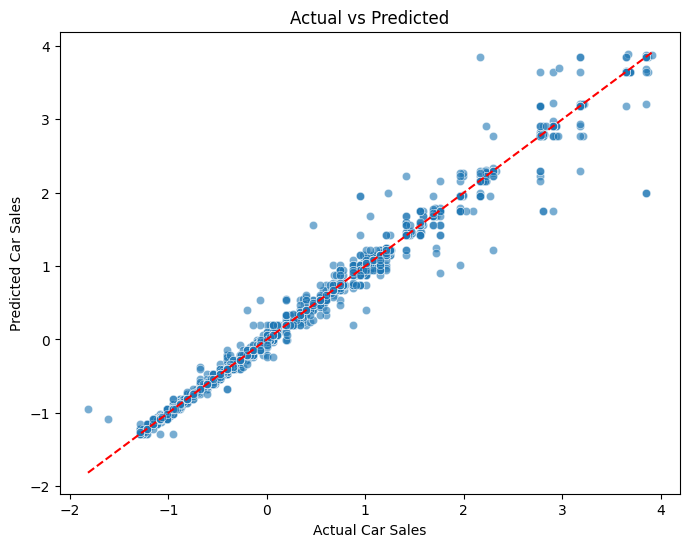

In [35]:
plot_actual_vs_predicted(y_test=y_test, y_pred=y_pred_tree_test)


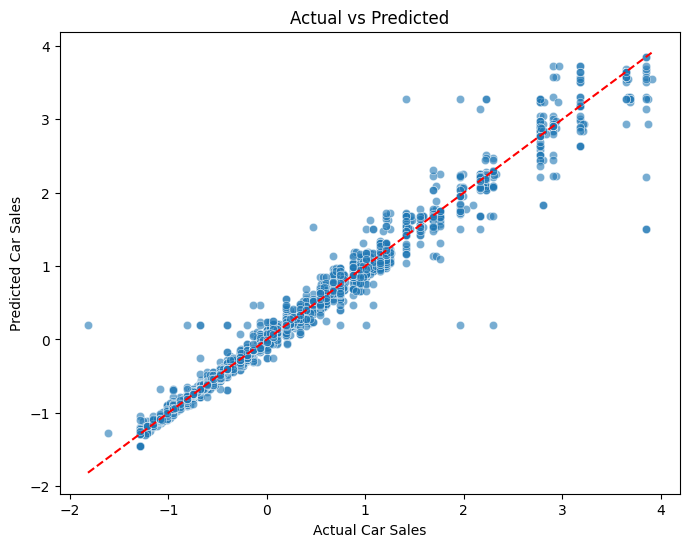

In [36]:
plot_actual_vs_predicted(y_test=y_test, y_pred=final_pred_test)

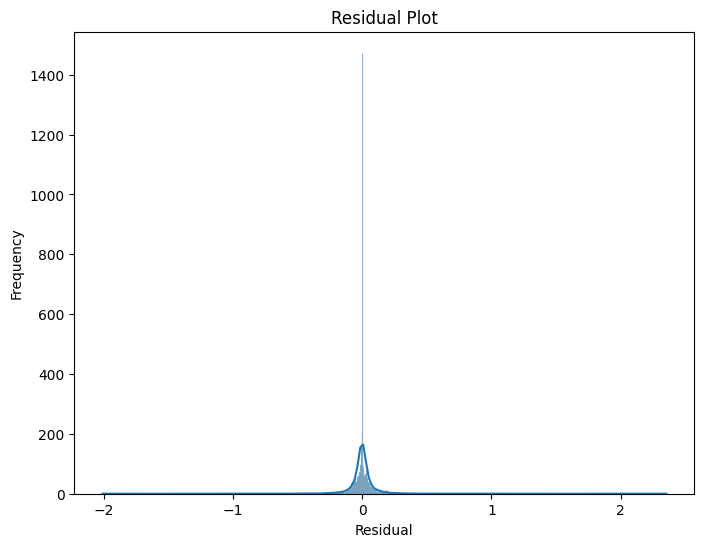

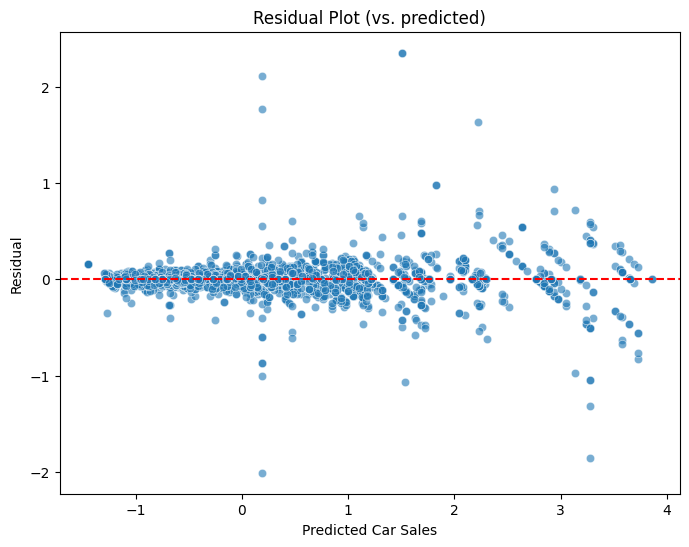

In [37]:
plot_residuals(y_test=y_test, y_pred=final_pred_test)


### **Random Forest**

In [38]:

# Assuming decision_tree_model is your trained model, and X_train, y_train, X_test, y_test are defined
print_regression_metrics(Random_Forest_Regressor, X_train, y_train, X_test, y_test, train=True)
print_regression_metrics(Random_Forest_Regressor, X_train, y_train, X_test, y_test, train=False)

Train Results:
R-squared: 0.9996463325661414
Mean Absolute Error: 0.005431598272589668
Mean Squared Error: 0.0003524719551599354
Root Mean Squared Error: 0.018774236473421108
Accuracy-like Measure (within 10%): 97.55%
Test Results:
R-squared: 0.9976650381042009
Mean Absolute Error: 0.013304444761391506
Mean Squared Error: 0.002366014571159867
Root Mean Squared Error: 0.04864169580884148
Accuracy-like Measure (within 10%): 93.37%


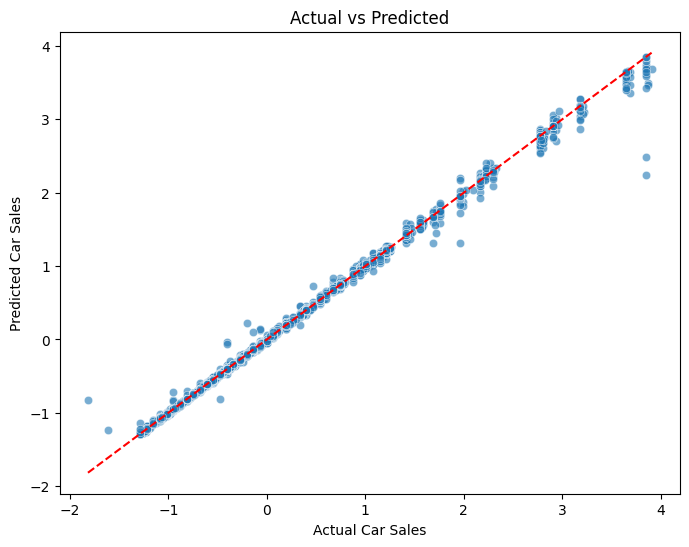

In [39]:
plot_actual_vs_predicted(y_test=y_test, y_pred=y_pred_rf_test)


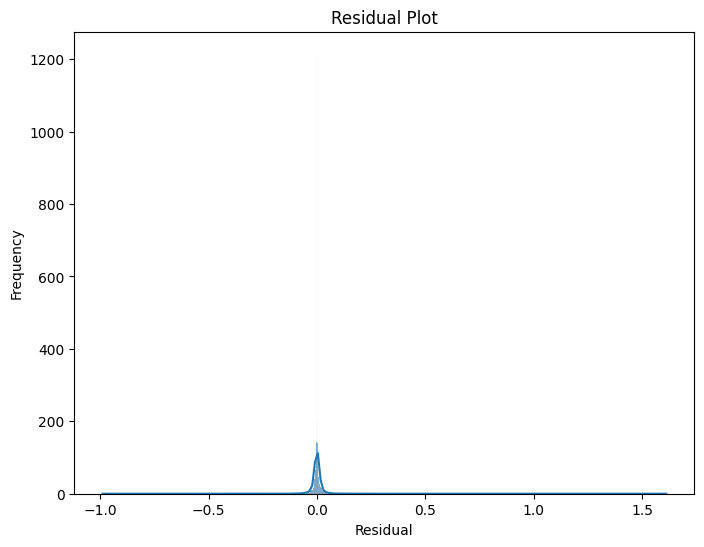

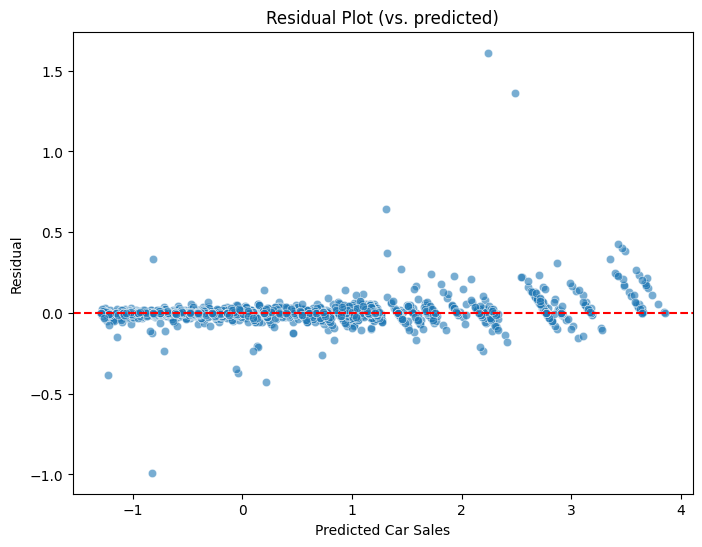

In [40]:
plot_residuals(y_test=y_test, y_pred=y_pred_rf_test)

### ****XGBoost****

In [41]:

# Assuming decision_tree_model is your trained model, and X_train, y_train, X_test, y_test are defined
print_regression_metrics(XGBoost_Regressor, X_train, y_train, X_test, y_test, train=True)
print_regression_metrics(XGBoost_Regressor, X_train, y_train, X_test, y_test, train=False)

Train Results:
R-squared: 0.9969660045834633
Mean Absolute Error: 0.030035129010567128
Mean Squared Error: 0.0030237398019534395
Root Mean Squared Error: 0.05498854246071121
Accuracy-like Measure (within 10%): 82.31%
Test Results:
R-squared: 0.9959387126060467
Mean Absolute Error: 0.033630294110522305
Mean Squared Error: 0.004115298484763099
Root Mean Squared Error: 0.06415059224015862
Accuracy-like Measure (within 10%): 81.16%


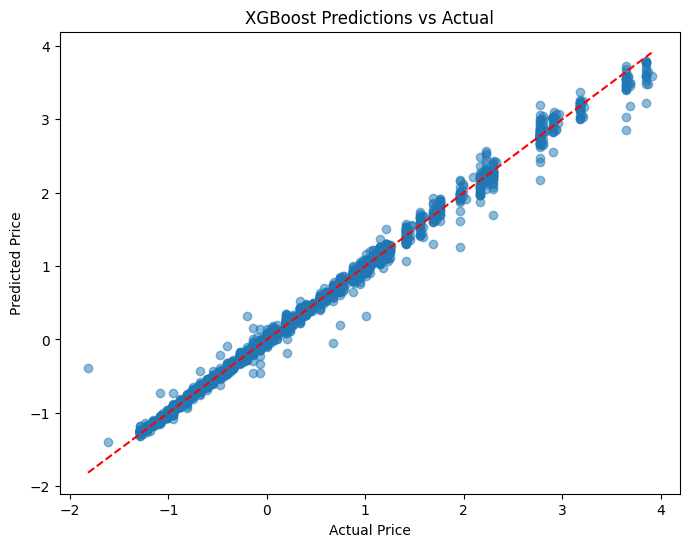

In [42]:

# XGBoost predicted vs actual
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_xb_test, alpha=0.5)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('XGBoost Predictions vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.show()

In [43]:
from sklearn.model_selection import RandomizedSearchCV
param_grid_xb = {
    'n_estimators': [100, 200, 300],  # Number of trees
    'max_depth': [3, 5, 7],  # Depth of trees
    'learning_rate': [0.01, 0.05, 0.1],  # Learning rate
    'subsample': [0.8, 0.9, 1.0],  # Fraction of samples for training each tree
    'colsample_bytree': [0.8, 0.9, 1.0],  # Fraction of features for training each tree
}

random_search = RandomizedSearchCV(XGBoost_Regressor, param_distributions=param_grid_xb, n_iter=30, 
                                   cv=5, n_jobs=-1, verbose=3)
random_search.fit(X_train, y_train)


Fitting 5 folds for each of 30 candidates, totalling 150 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          feature_weights=None, gamma=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraint...
                                          max_delta_step=None, max_depth=5,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None, n_estimators=120,
                                          n_jobs=None, num_parallel_tree=None, ...),
                   n_iter=30, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.8, 0.9, 1.0],
                                        'learning_rate': [0.01, 0.05, 0.1],
                                        'max_depth': [3, 5, 7],
                                        'n_estimators': [100, 200, 300],
                                        'subsample': [0.8, 0.9, 1.0]},
                   verbose=3)

In [44]:
print_regression_metrics(random_search, X_train, y_train, X_test, y_test, train=True)
print_regression_metrics(random_search, X_train, y_train, X_test, y_test, train=False)

Train Results:
R-squared: 0.9994842875273816
Mean Absolute Error: 0.013045760485941105
Mean Squared Error: 0.0005139692437637024
Root Mean Squared Error: 0.022670889787648443
Accuracy-like Measure (within 10%): 91.70%
Test Results:
R-squared: 0.9976402196270643
Mean Absolute Error: 0.0194403055501308
Mean Squared Error: 0.0023911631094057995
Root Mean Squared Error: 0.04889952054372108
Accuracy-like Measure (within 10%): 88.85%


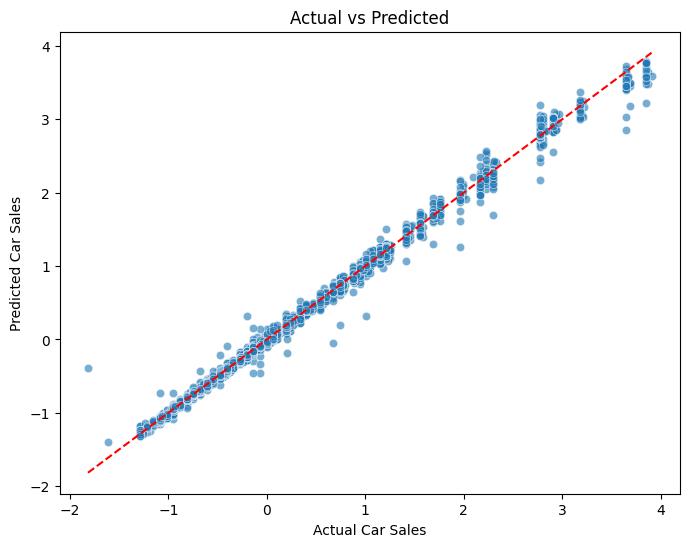

In [45]:
plot_actual_vs_predicted(y_test=y_test, y_pred=y_pred_xb_test)


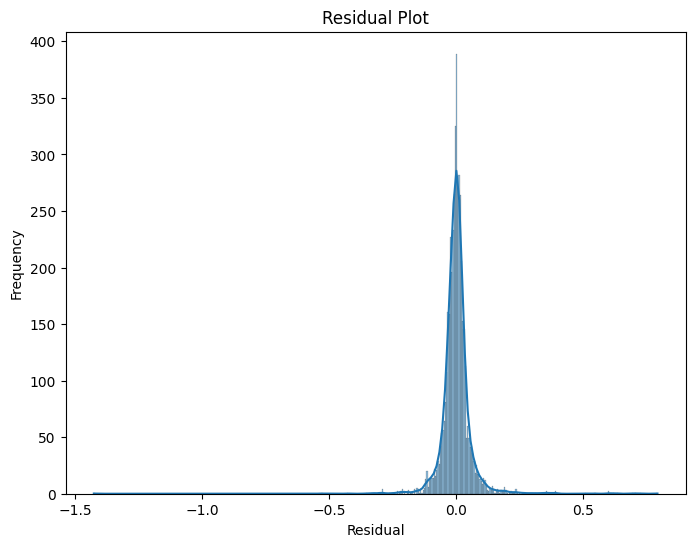

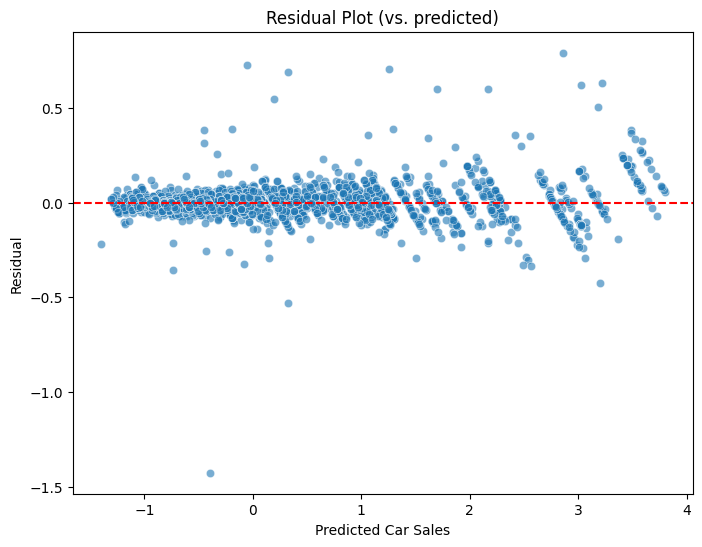

In [46]:
plot_residuals(y_test=y_test, y_pred=y_pred_xb_test)


### **Gradient Boosting**

In [47]:

# Assuming decision_tree_model is your trained model, and X_train, y_train, X_test, y_test are defined
print_regression_metrics(Gradient_Boosting_Regressor, X_train, y_train, X_test, y_test, train=True)
print_regression_metrics(Gradient_Boosting_Regressor, X_train, y_train, X_test, y_test, train=False)

Train Results:
R-squared: 0.9985395237607111
Mean Absolute Error: 0.025392260197767795
Mean Squared Error: 0.0014555394877906226
Root Mean Squared Error: 0.0381515332298798
Accuracy-like Measure (within 10%): 83.08%
Test Results:
R-squared: 0.9975866750690525
Mean Absolute Error: 0.029769498834933746
Mean Squared Error: 0.002445419756886966
Root Mean Squared Error: 0.04945118559637338
Accuracy-like Measure (within 10%): 81.07%


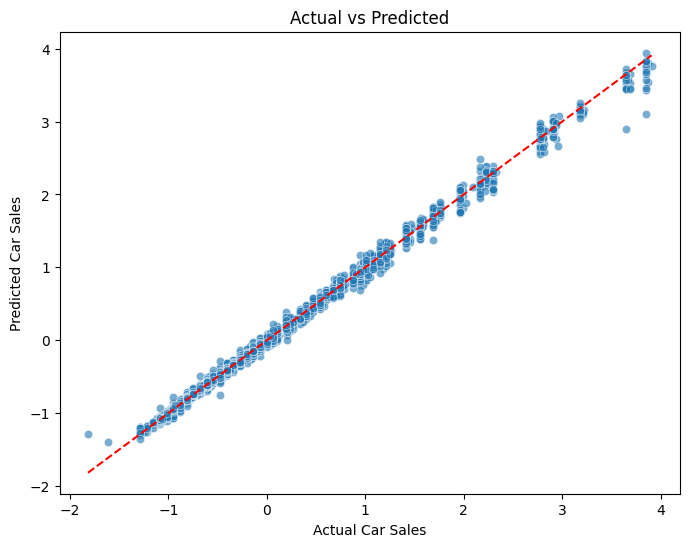

In [48]:
plot_actual_vs_predicted(y_test=y_test, y_pred=y_pred_gb_test)   


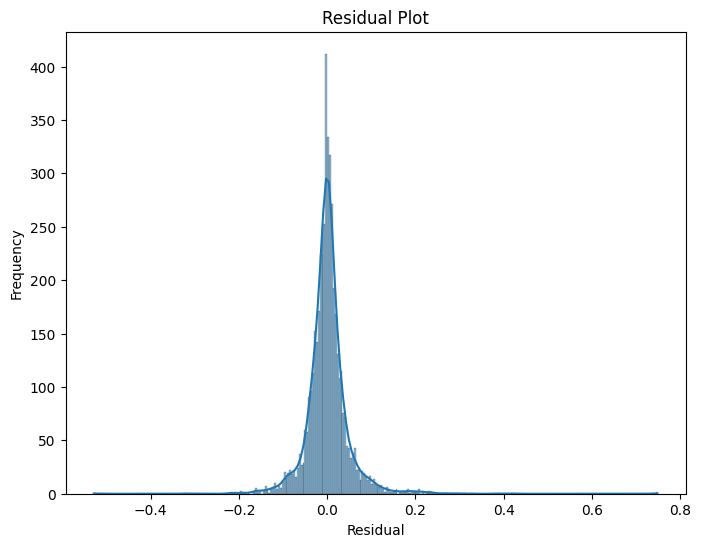

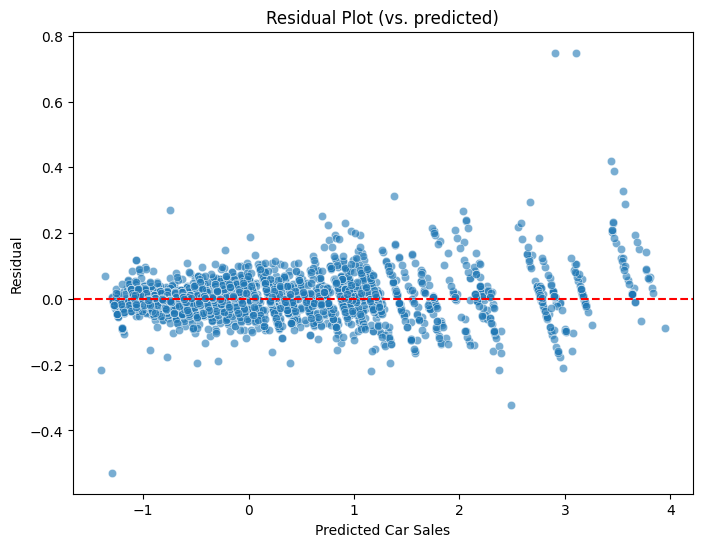

In [49]:
plot_residuals(y_test=y_test, y_pred=y_pred_gb_test)

## **Comparison and Best Model**
- Compare the models' performance and choose the best-performing model based on evaluation metrics.


In [50]:
results = {
    'Model': ['Gradient Boost', 'Decision Tree', 'XGBoost', 'Random Forest' ],
    
    'R² Train': [
        r2_score(y_train, y_pred_gb_train),
        r2_score(y_train, final_pred_train),
        r2_score(y_train, y_pred_xb_train),
        r2_score(y_train, y_pred_rf_train)
    ],
    
    'R² Test': [
        r2_score(y_test, y_pred_gb_test),
        r2_score(y_test, final_pred_test),
        r2_score(y_test, y_pred_xb_test),
        r2_score(y_test, y_pred_rf_test)
    ],
    
    'MAE Train': [
        mean_absolute_error(y_train, y_pred_gb_train),
        mean_absolute_error(y_train, final_pred_train),
        mean_absolute_error(y_train, y_pred_xb_train),
        mean_absolute_error(y_train, y_pred_rf_train)
    ],
    
    'MAE Test': [
        mean_absolute_error(y_test, y_pred_gb_test),
        mean_absolute_error(y_test, final_pred_test),
        mean_absolute_error(y_test, y_pred_xb_test),
        mean_absolute_error(y_test, y_pred_rf_test)
    ],
    
    'RMSE Train': [
        np.sqrt(mean_squared_error(y_train, y_pred_gb_train)),
        np.sqrt(mean_squared_error(y_train, final_pred_train)),
        np.sqrt(mean_squared_error(y_train, y_pred_xb_train)),
        np.sqrt(mean_squared_error(y_train, y_pred_rf_train))
    ],
    
    'RMSE Test': [
        np.sqrt(mean_squared_error(y_test, y_pred_gb_test)),
        np.sqrt(mean_squared_error(y_test, final_pred_test)),
        np.sqrt(mean_squared_error(y_test, y_pred_xb_test)),
        np.sqrt(mean_squared_error(y_test, y_pred_rf_test))
    ],
    'Time Train': [
        end_time_gb - start_time_gb,
        end_time_dt - start_time_dt,
        end_time_xb - start_time_xb,
        end_time_rf - start_time_rf
    ],
}

# Create and display the DataFrame
results_df = pd.DataFrame(results)
results_df.set_index('Model', inplace=True)
print(results_df)


                R² Train   R² Test  MAE Train  MAE Test  RMSE Train  \
Model                                                                 
Gradient Boost  0.998540  0.997587   0.025392  0.029769    0.038152   
Decision Tree   0.991462  0.982088   0.037748  0.052398    0.092244   
XGBoost         0.996966  0.995939   0.030035  0.033630    0.054989   
Random Forest   0.999646  0.997665   0.005432  0.013304    0.018774   

                RMSE Test  Time Train  
Model                                  
Gradient Boost   0.049451    9.606206  
Decision Tree    0.134721    0.357279  
XGBoost          0.064151    1.170906  
Random Forest    0.048642   15.860011  


In [51]:
results_df.sort_values(by='R² Train', ascending=True, inplace=False)


,R² Train,R² Test,MAE Train,MAE Test,RMSE Train,RMSE Test,Time Train
Model,,,,,,,
Decision Tree,0.991462,0.982088,0.037748,0.052398,0.092244,0.134721,0.357279
XGBoost,0.996966,0.995939,0.030035,0.033630,0.054989,0.064151,1.170906
Gradient Boost,0.998540,0.997587,0.025392,0.029769,0.038152,0.049451,9.606206
Random Forest,0.999646,0.997665,0.005432,0.013304,0.018774,0.048642,15.860011


In [52]:

reg_models = {
    'Decision Tree': Decision_Tree_Regressor,
    'Random Forest': Random_Forest_Regressor,
    'XGBoost': XGBoost_Regressor,
    'Gradient Boosting': Gradient_Boosting_Regressor
}
scoring = {
    'r2': make_scorer(r2_score),
    'mse': make_scorer(mean_squared_error),
    'mae': make_scorer(mean_absolute_error),
    'mape': make_scorer(mean_absolute_percentage_error)
}


regression_results = {}

for name, model in reg_models.items():
    scores = cross_validate(model, x, y, cv=5, scoring=scoring)
    regression_results[name] = {
        'R2 Mean': scores['test_r2'].mean(),
        'MSE Mean': scores['test_mse'].mean(),
        'MAE Mean': scores['test_mae'].mean(),
        'MAPE Mean': scores['test_mape'].mean()
    }


for model, metrics in regression_results.items():
    print(f"\n Model: {model}")
    for metric_name, value in metrics.items():
        print(f"{metric_name}: {value:.4f}")
cros_results = pd.DataFrame(regression_results)



 Model: Decision Tree
R2 Mean: 0.9917
MSE Mean: 0.0083
MAE Mean: 0.0250
MAPE Mean: 0.1549

 Model: Random Forest
R2 Mean: 0.9976
MSE Mean: 0.0024
MAE Mean: 0.0133
MAPE Mean: 0.0524

 Model: XGBoost
R2 Mean: 0.9955
MSE Mean: 0.0045
MAE Mean: 0.0342
MAPE Mean: 0.2000

 Model: Gradient Boosting
R2 Mean: 0.9973
MSE Mean: 0.0027
MAE Mean: 0.0299
MAPE Mean: 0.1828


In [53]:
print(cros_results)

           Decision Tree  Random Forest   XGBoost  Gradient Boosting
R2 Mean         0.991713       0.997627  0.995515           0.997270
MSE Mean        0.008280       0.002371  0.004459           0.002725
MAE Mean        0.024973       0.013339  0.034188           0.029892
MAPE Mean       0.154923       0.052389  0.200048           0.182812


In [54]:
print(X_test.shape)
print(y_test.shape)
print(X_train.shape)
print(y_train.shape)

print(y_pred_gb_test.shape)
print(y_pred_tree_test.shape)
print(y_pred_xb_test.shape)
print(y_pred_rf_test.shape)

print(y_pred_gb_train.shape)
print(y_pred_tree_train.shape)  
print(y_pred_xb_train.shape)
print(y_pred_rf_train.shape)

print(cros_results.shape)


(4618, 14)
(4618,)
(18471, 14)
(18471,)
(4618,)
(4618,)
(4618,)
(4618,)
(18471,)
(18471,)
(18471,)
(18471,)
(4, 4)


In [55]:
def plot_learning_curve(model, X, y, title='Learning Curve', ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(0.1, 1.0, 10)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()  
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    plt.legend(loc="best")
    plt.show()

def plot_dashboard(y_test, y_pred, model_name='Model'):

    residuals = y_test - y_pred

    # ---- Dashboard ----
    fig, axs = plt.subplots(1, 1, figsize=(8, 5))

    # Plot: Residual Plot
    sns.scatterplot(x=y_pred, y=residuals, ax=axs, alpha=0.5)
    axs.axhline(0, color='red', linestyle='--')
    axs.set_title(f'Residual Plot: {model_name}')
    axs.set_xlabel('Predicted Values')
    axs.set_ylabel('Residuals')
    axs.grid(True)

    plt.tight_layout()
    plt.show()


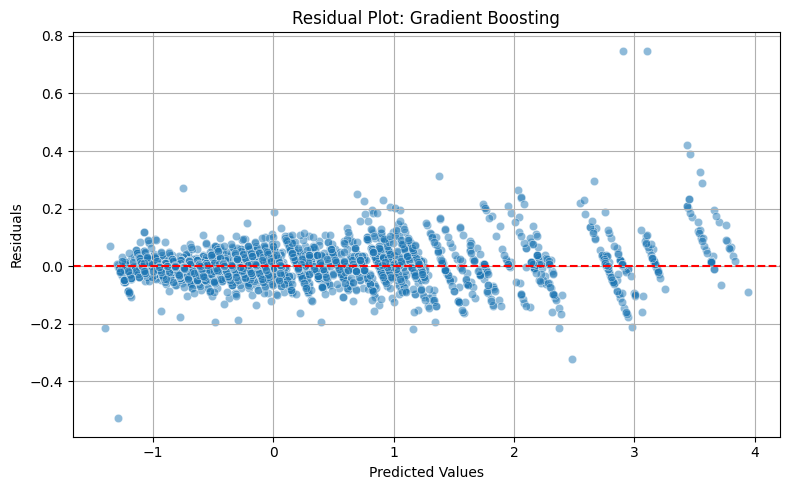

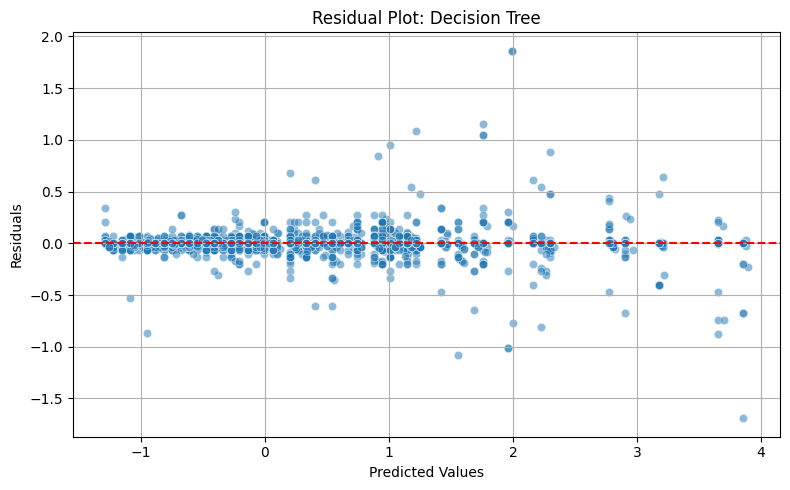

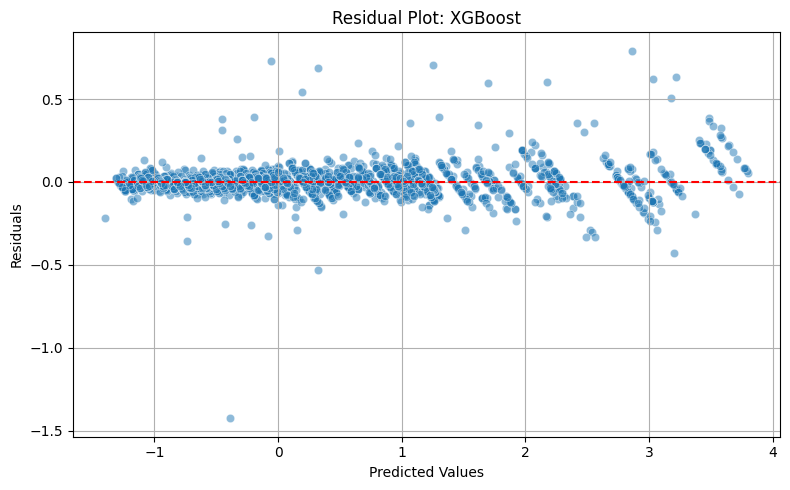

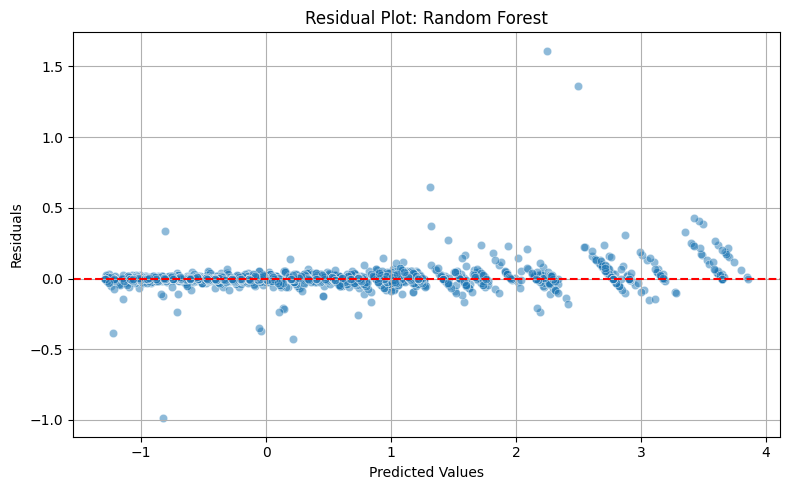

In [56]:
plot_dashboard(y_test, y_pred_gb_test, model_name='Gradient Boosting')
plot_dashboard(y_test, y_pred_tree_test, model_name='Decision Tree')
plot_dashboard(y_test, y_pred_xb_test, model_name='XGBoost')
plot_dashboard(y_test, y_pred_rf_test, model_name='Random Forest')



# **ML Forcasting Models**


### **prophet**

In [57]:
cars_sales_Model.columns

Index(['Date', 'Annual Income', 'Company', 'Engine', 'Price ($)', 'Body Style',
       'Price_to_Income', 'Holiday', 'Is_Holiday', 'Is_Weekend', 'model',
       'Engine_to_Model', 'Income_Bracket', 'Seasonal_Price_Index',
       'Company_Strength', 'PI_plus_model'],
      dtype='object')

In [58]:
cars_sales_Model = cars_sales_Model.rename(columns={'Date': 'ds', 'Price ($)': 'y'})


In [59]:
cars_sales_Model.columns

Index(['ds', 'Annual Income', 'Company', 'Engine', 'y', 'Body Style',
       'Price_to_Income', 'Holiday', 'Is_Holiday', 'Is_Weekend', 'model',
       'Engine_to_Model', 'Income_Bracket', 'Seasonal_Price_Index',
       'Company_Strength', 'PI_plus_model'],
      dtype='object')

In [60]:
model_prophet = Prophet(yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=True)
print('start fitting prophet model....') 

model_prophet.fit(cars_sales_Model)


print('prophet model fitted done')

start fitting prophet model....


03:13:32 - cmdstanpy - INFO - Chain [1] start processing
03:13:46 - cmdstanpy - INFO - Chain [1] done processing


prophet model fitted done


In [61]:
future_prophet = model_prophet.make_future_dataframe(periods=30)  # forecast next 30 days
print('start forecasting prophet model....')
forecast_prophet = model_prophet.predict(future_prophet)
print('prophet model forecast done')

forecast_prophet.tail()

start forecasting prophet model....
prophet model forecast done


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
637,2024-01-26,-0.132344,-1.310104,1.125551,-0.132377,-0.132307,0.080501,0.080501,0.080501,0.125083,...,0.014079,0.014079,0.014079,-0.058661,-0.058661,-0.058661,0.0,0.0,0.0,-0.051843
638,2024-01-27,-0.132333,-1.330525,1.187295,-0.132369,-0.132292,0.055683,0.055683,0.055683,0.125083,...,-0.016991,-0.016991,-0.016991,-0.052409,-0.052409,-0.052409,0.0,0.0,0.0,-0.076650
639,2024-01-28,-0.132322,-1.402832,1.252729,-0.132361,-0.132279,0.074567,0.074567,0.074567,0.125083,...,-0.004677,-0.004677,-0.004677,-0.045839,-0.045839,-0.045839,0.0,0.0,0.0,-0.057754
640,2024-01-29,-0.132310,-1.384641,1.296560,-0.132353,-0.132265,0.090176,0.090176,0.090176,0.125083,...,0.004186,0.004186,0.004186,-0.039093,-0.039093,-0.039093,0.0,0.0,0.0,-0.042134
641,2024-01-30,-0.132299,-1.410789,1.209390,-0.132345,-0.132250,0.067456,0.067456,0.067456,0.125083,...,-0.025310,-0.025310,-0.025310,-0.032317,-0.032317,-0.032317,0.0,0.0,0.0,-0.064843


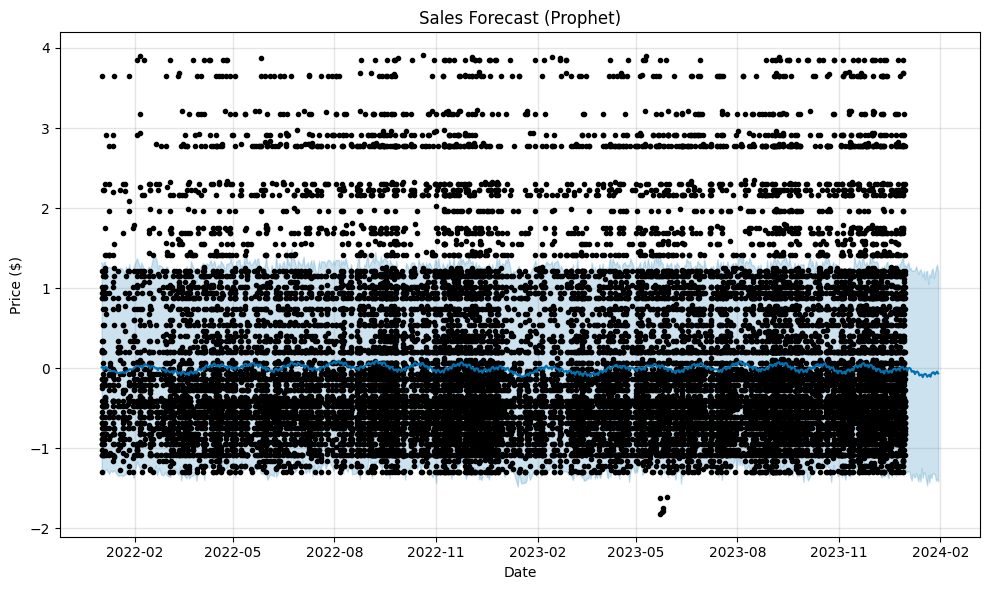

In [62]:
fig = model_prophet.plot(forecast_prophet)
plt.title('Sales Forecast (Prophet)')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.tight_layout()
plt.show()
fig.savefig('./Images/prophet.png')

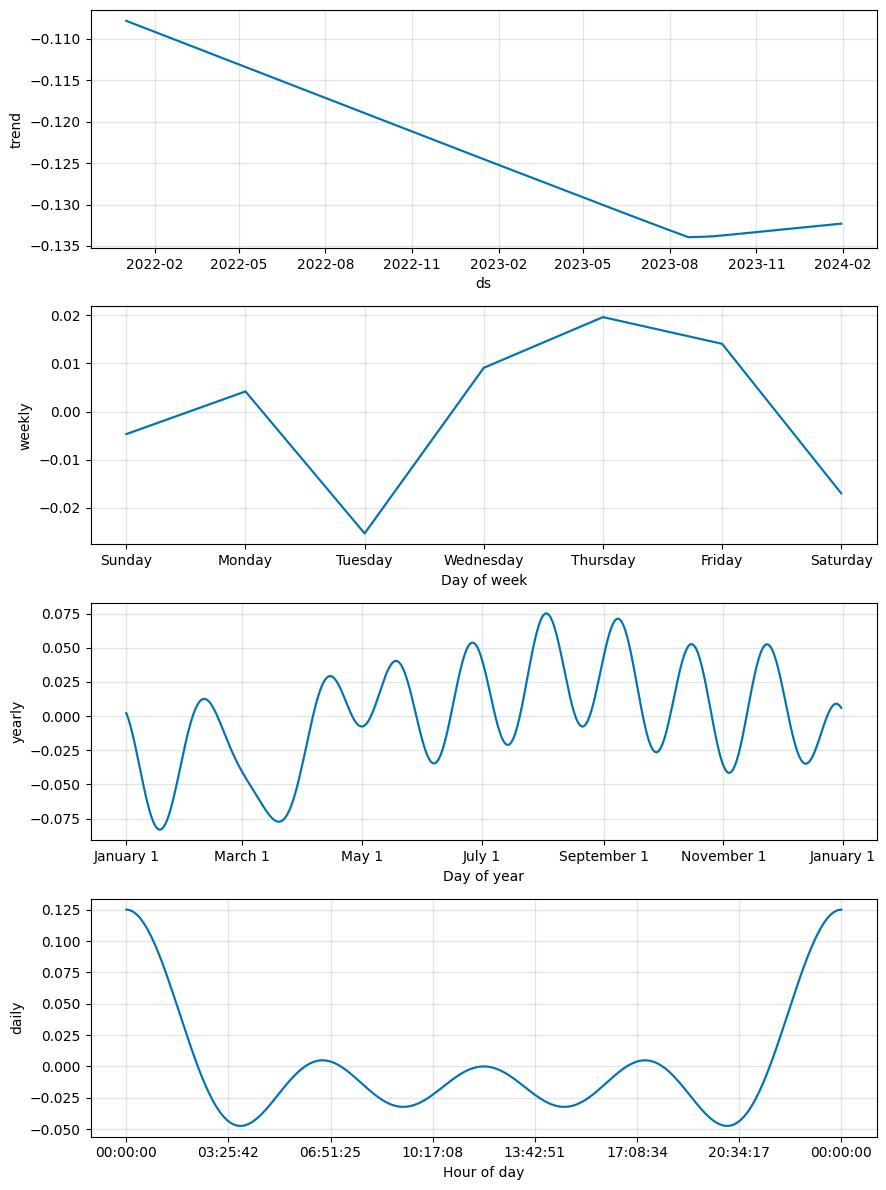

In [63]:
fig2 = model_prophet.plot_components(forecast_prophet)
plt.savefig( './Images/prophet_components.png')
plt.show()

In [64]:
train_p, test_p = train_test_split(cars_sales_Model, test_size=0.2, shuffle=False)

print(f"Train shape: {train_p.shape}")
print(f"Test shape: {test_p.shape}")
print(f"Train date range: {train_p['ds'].min()} to {train_p['ds'].max()}")
print(f"Test date range: {test_p['ds'].min()} to {test_p['ds'].max()}")

Train shape: (18471, 16)
Test shape: (4618, 16)
Train date range: 2022-01-02 00:00:00 to 2023-10-01 00:00:00
Test date range: 2023-10-01 00:00:00 to 2023-12-31 00:00:00


In [65]:
model = Prophet(yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=True)
print('start fitting the train prophet model....')
model.fit(train_p)
print('train prophet model fitted done')

start fitting the train prophet model....


03:13:55 - cmdstanpy - INFO - Chain [1] start processing
03:14:03 - cmdstanpy - INFO - Chain [1] done processing


train prophet model fitted done


In [66]:
future_p_train = pd.concat([train_p[['ds']], test_p[['ds']]]).drop_duplicates().sort_values('ds')
forecast_p_train = model_prophet.predict(future_prophet)
forecast_test_p = forecast_p_train[forecast_p_train['ds'].isin(test_p['ds'])]
y_true_p = test_p['y'].values
y_pred_p = forecast_test_p['yhat'].values

In [67]:
print(f"Length of y_true: {len(y_true_p)}")
print(f"Length of y_pred: {len(y_pred_p)}")

print(test_p.head())
print(test_p.columns)

# Check arrays
print("y_true shape:", y_true_p.shape)
print("y_pred shape:", y_pred_p.shape)

Length of y_true: 4618
Length of y_pred: 85
              ds  Annual Income  Company  Engine         y  Body Style  \
18471 2023-10-01      -0.279768       29       1 -0.748388           4   
18472 2023-10-01      -0.182179       22       1  0.537768           1   
18473 2023-10-01      -1.306225       22       0 -0.680696           4   
18474 2023-10-01       0.204628       15       1 -0.680696           2   
18475 2023-10-01       1.065184        2       1 -0.477619           3   

       Price_to_Income  Holiday  Is_Holiday  Is_Weekend         model  \
18471         0.028716       11           0           1  27785.415441   
18472         0.055641       11           0           1  21066.011236   
18473         1.333333       11           0           1  32925.067797   
18474         0.020809       11           0           1  42347.360000   
18475         0.015556       11           0           1  29480.012739   

       Engine_to_Model  Income_Bracket  Seasonal_Price_Index  \
18471   

In [68]:

print("First 10 values of y_true:", y_true_p[:10])
print("First 10 values of y_pred:", y_pred_p[:10])

# 9. Check for missing values
print("Missing values in y_true:", np.sum(np.isnan(y_true_p)))
print("Missing values in y_pred:", np.sum(np.isnan(y_pred_p)))

First 10 values of y_true: [-0.74838844  0.53776817 -0.68069598 -0.68069598 -0.47761863 -0.68069598
 -0.54524339 -0.74838844 -0.40985848  2.23014719]
First 10 values of y_pred: [-0.03541656 -0.02283588 -0.04765482 -0.00776222  0.00996507 -0.01424477
  0.00498239  0.02060569 -0.0024884   0.03776355]
Missing values in y_true: 0
Missing values in y_pred: 0


In [69]:
if len(y_true_p) != len(y_pred_p):
    y_true_p = y_true_p[-len(y_pred_p):]
    print("Adjusted y_true shape:", y_true_p.shape)
y_true_subset = y_true_p[-85:]  
    

Adjusted y_true shape: (85,)


In [70]:
rmse = np.sqrt(mean_squared_error(y_true_subset, y_pred_p))
mae = mean_absolute_error(y_true_subset, y_pred_p)
r2 = 1 - sum((y_true_subset - y_pred_p)**2) / sum((y_true_subset - np.mean(y_true_subset))**2)

print("RMSE:", rmse)
print("MAE:", mae)
print("R2:", r2)

RMSE: 0.987236993767962
MAE: 0.7748008986822177
R2: -0.005605178500896368


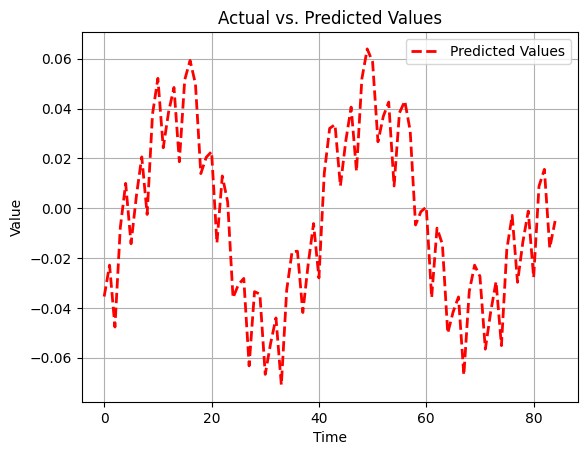

In [71]:
plt.plot(y_pred_p, label="Predicted Values", color='red', linestyle='--', linewidth=2)
plt.title("Actual vs. Predicted Values")
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()

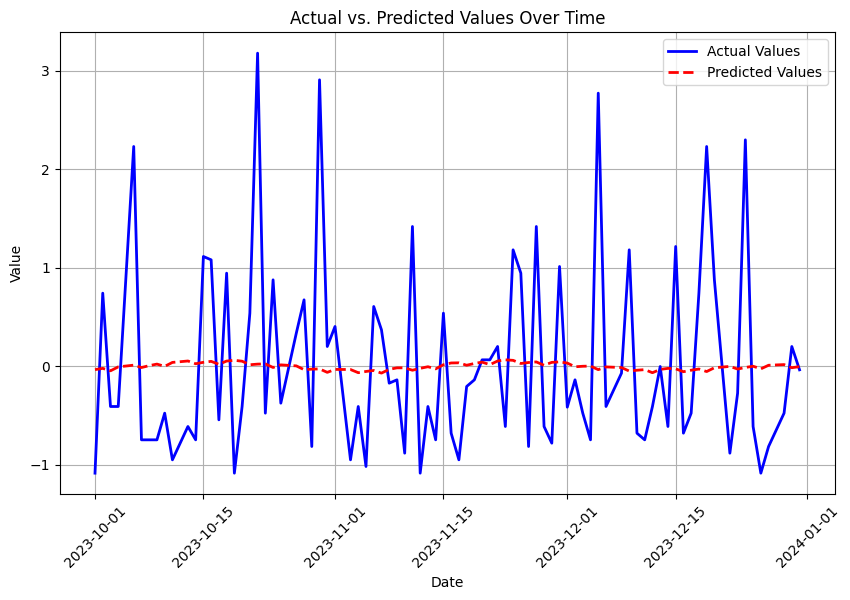

In [72]:

plt.figure(figsize=(10, 6))

plt.plot(forecast_test_p['ds'][-85:], y_true_subset, label="Actual Values", color='blue', linewidth=2)
plt.plot(forecast_test_p['ds'][-85:], y_pred_p, label="Predicted Values", color='red', linestyle='--', linewidth=2)
plt.title("Actual vs. Predicted Values Over Time")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


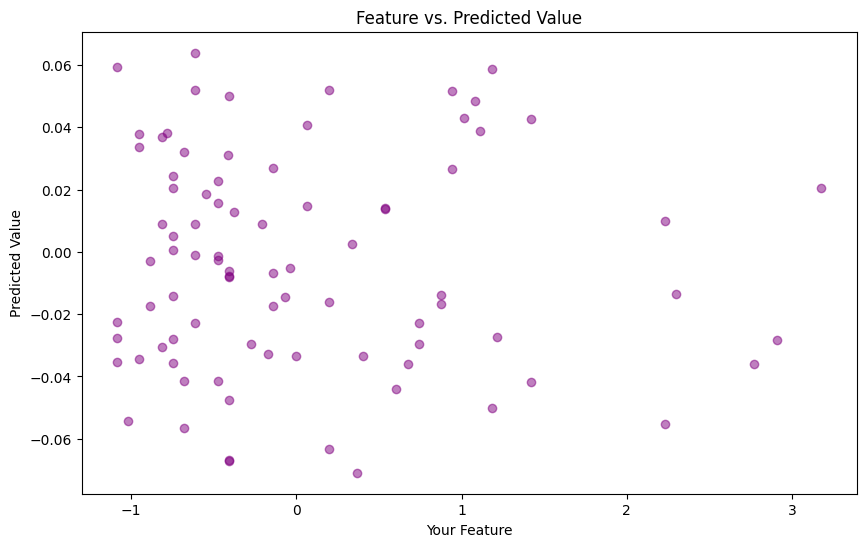

In [73]:
plt.figure(figsize=(10, 6))
plt.scatter(y_true_subset, y_pred_p, alpha=0.5, color='purple')
plt.title("Feature vs. Predicted Value")
plt.xlabel("Your Feature")
plt.ylabel("Predicted Value")

plt.show()


### **Arima**

In [74]:
cars_sales_Model = cars_sales_Model.sort_values('ds')
train_a, test_a = train_test_split(cars_sales_Model, test_size=0.2, shuffle=False)

print(f"Train shape: {train_a.shape}")
print(f"Test shape: {test_a.shape}")
print(f"Train date range: {train_a['ds'].min()} to {train_a['ds'].max()}")
print(f"Test date range: {test_a['ds'].min()} to {test_a['ds'].max()}")

Train shape: (18471, 16)
Test shape: (4618, 16)
Train date range: 2022-01-02 00:00:00 to 2023-10-01 00:00:00
Test date range: 2023-10-01 00:00:00 to 2023-12-31 00:00:00


In [75]:
train_idx = train_a.set_index('ds')
test_idx  = test_a.set_index('ds')


In [76]:
model_Arima = ARIMA(train_idx['y'], order=(5, 1, 0))   # tweak (p,d,q) as needed
model_fit_Arima = model_Arima.fit()

c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [77]:
fc_A = model_fit_Arima.forecast(steps=len(test_idx))
forecast_df_A = pd.DataFrame({'predicted_mean': fc_A}, index=test_idx.index)

forecast_df_A['predicted_mean'] = (
    forecast_df_A['predicted_mean']
      .fillna(method='ffill')
      .fillna(method='bfill')
)

y_true_A = test_idx['y'].values
y_pred_A = forecast_df_A['predicted_mean'].values


c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\DELL\AppData\Local\Temp\ipykernel_5276\4180718312.py:5: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  forecast_df_A['predicted_mean']


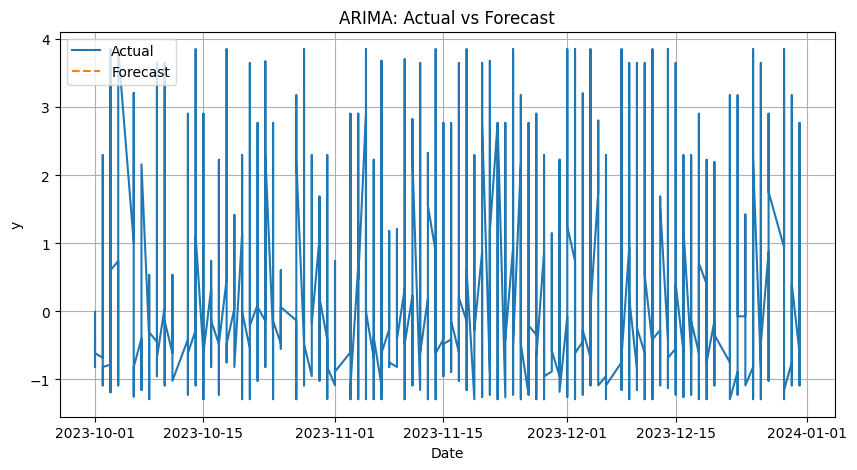

In [78]:
plt.figure(figsize=(10,5))
plt.plot(test_idx.index, test_idx['y'],      label='Actual')
plt.plot(forecast_df_A.index, y_pred_A, linestyle='--', label='Forecast')
plt.title('ARIMA: Actual vs Forecast')
plt.xlabel('Date'); plt.ylabel('y')
plt.legend(); plt.grid(True)
plt.show()

In [79]:

forecast_test_Arima  = model_fit_Arima.forecast(steps=len(test_a))
forecast_test_Arima = pd.DataFrame(forecast_test_Arima, columns=['predicted_mean'], index=test_a.index)
forecast_test_Arima['predicted_mean'].fillna(method='ffill', inplace=True)  # Forward fill the missing values


c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\DELL\AppData\Local\Temp\ipykernel_5276\2230306598.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  forecast_test_Arima['predicted_mean'].fillna(method='ffill', inplace=True)  # Forward fill the missing values
C:\Users\DELL\AppData\Local\Temp\ipykernel_52

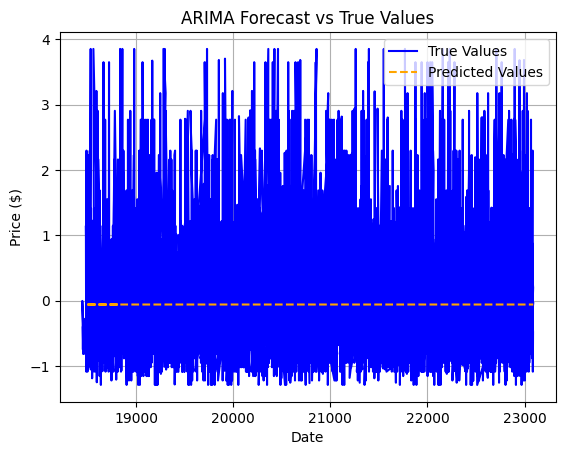

In [80]:
plt.plot(test_a.index, test_a['y'], label='True Values', color='blue')

# Plot predicted values from the ARIMA forecast
plt.plot(forecast_test_Arima.index, forecast_test_Arima['predicted_mean'], label='Predicted Values', linestyle='--', color='orange')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.title('ARIMA Forecast vs True Values')
plt.legend()
plt.grid(True)
plt.show()

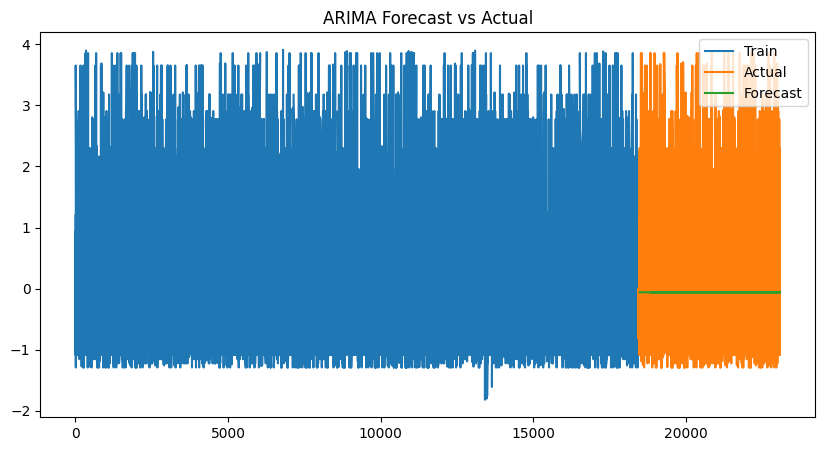

In [81]:
plt.figure(figsize=(10,5))
plt.plot(train_a.index, train_a['y'], label='Train')
plt.plot(test_a.index, test_a['y'], label='Actual')
plt.plot(test_a.index, forecast_test_Arima, label='Forecast')
plt.legend()
plt.title('ARIMA Forecast vs Actual')
plt.show()

### **XGBoost with Prophet**

In [82]:
df = joblib.load('./Assisting/dataModeling.pkl')
df['Price_to_Income'] = df['Price ($)'] / df['Annual Income']
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['DayOfWeek'] = df['Date'].dt.dayofweek
df['Price_Lag1'] = df['Price ($)'].shift(1)
df['Price_Lag2'] = df['Price ($)'].shift(2)
df['Rolling_Mean_7'] = df['Price ($)'].rolling(window=7).mean()
df['Rolling_Std_7'] = df['Price ($)'].rolling(window=7).std()
df.fillna(method='bfill', inplace=True)


C:\Users\DELL\AppData\Local\Temp\ipykernel_5276\2756930459.py:11: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)


In [83]:
X = df.drop(['Price ($)', 'Date'], axis=1)
y = df['Price ($)']
X = pd.get_dummies(X, drop_first=True)

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Scale data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_scaled = scaler.fit_transform(X)  # For cross-validation

In [85]:
xgb = XGBRegressor(
    objective='reg:squarederror',
    colsample_bytree=0.8,
    learning_rate=0.1,
    max_depth=9,
    n_estimators=300,
    subsample=0.9,
    random_state=42
)
#Best parameters: {'subsample': 0.9, 'n_estimators': 300, 'max_depth': 9, 'learning_rate': 0.1, 'colsample_bytree': 0.8}

In [86]:
print('start fitting the train xgboost model and predicting testing....')
xgb.fit(X_train_scaled, y_train)
predictions = xgb.predict(X_test_scaled)
print('xgboost model fitted and prediction done')

start fitting the train xgboost model and predicting testing....
xgboost model fitted and prediction done


In [87]:

mae = mean_absolute_error(y_test, predictions)
rmse = np.sqrt(mean_squared_error(y_test, predictions))
r2 = r2_score(y_test, predictions)
print(f"XGBoost MAE (Test Set): {mae:.6f}")
print(f"XGBoost MAE (Train Set): {mean_absolute_error(y_train, xgb.predict(X_train_scaled)):.6f}")
print(f"XGBoost RMSE (Test Set): {rmse:.6f}")
print(f"XGBoost RMSE (Train Set): {np.sqrt(mean_squared_error(y_train, xgb.predict(X_train_scaled))):.6f}")
print(f"XGBoost R² (Test Set): {r2:.6f}")
print(f"XGBoost R2 (Train Set): {r2_score(y_train, xgb.predict(X_train_scaled)):.6f}")


XGBoost MAE (Test Set): 0.086103
XGBoost MAE (Train Set): 0.013099
XGBoost RMSE (Test Set): 0.138564
XGBoost RMSE (Train Set): 0.018245
XGBoost R² (Test Set): 0.980819
XGBoost R2 (Train Set): 0.999667


In [88]:
tscv = TimeSeriesSplit(n_splits=5)
cv_scores = cross_val_score(xgb, X_scaled, y, cv=tscv, scoring='neg_mean_absolute_error')
cv_mae = -cv_scores.mean()
print(f"TimeSeriesSplit CV MAE: {cv_mae:.6f}")
print(f"Cross-Validation MAE: {cv_mae:.6f}")
print(f"Cross-Validation RMSE: {np.sqrt(-cv_scores.mean()):.6f}")
print(f"Cross-Validation R2: {cv_scores.mean():.6f}")

TimeSeriesSplit CV MAE: 0.128857
Cross-Validation MAE: 0.128857
Cross-Validation RMSE: 0.358966
Cross-Validation R2: -0.128857


In [89]:
# Walk-forward validation
mae_scores, rmse_scores = [], []
for train_idx, test_idx in tscv.split(X_scaled):
    X_tr, X_te = X_scaled[train_idx], X_scaled[test_idx]
    y_tr, y_te = y.iloc[train_idx], y.iloc[test_idx]
    xgb.fit(X_tr, y_tr)
    preds = xgb.predict(X_te)
    mae_scores.append(mean_absolute_error(y_te, preds))
    rmse_scores.append(np.sqrt(mean_squared_error(y_te, preds)))
print(f"Walk-Forward MAE: {np.mean(mae_scores):.6f}")
print(f"Walk-Forward RMSE: {np.mean(rmse_scores):.6f}")
print(f"Walk-Forward R2: {r2_score(y, xgb.predict(X)):.6f}")

Walk-Forward MAE: 0.128857
Walk-Forward RMSE: 0.204267
Walk-Forward R2: -0.028964


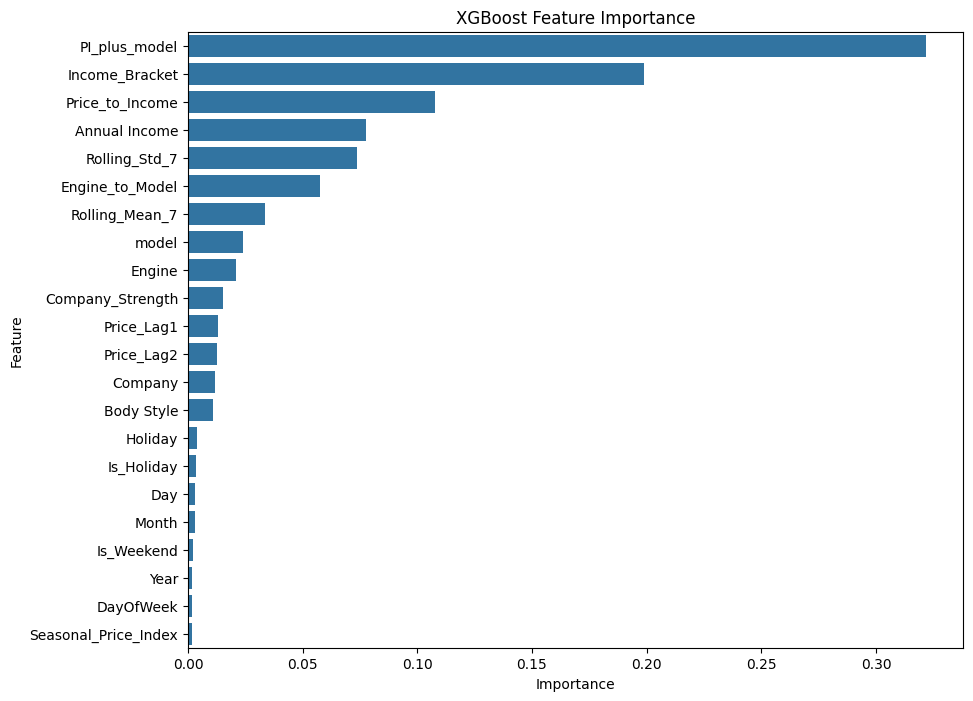

In [90]:
# Feature importance plot
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': xgb.feature_importances_})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('XGBoost Feature Importance')
plt.savefig('./Images/feature_importance.png')
plt.show()

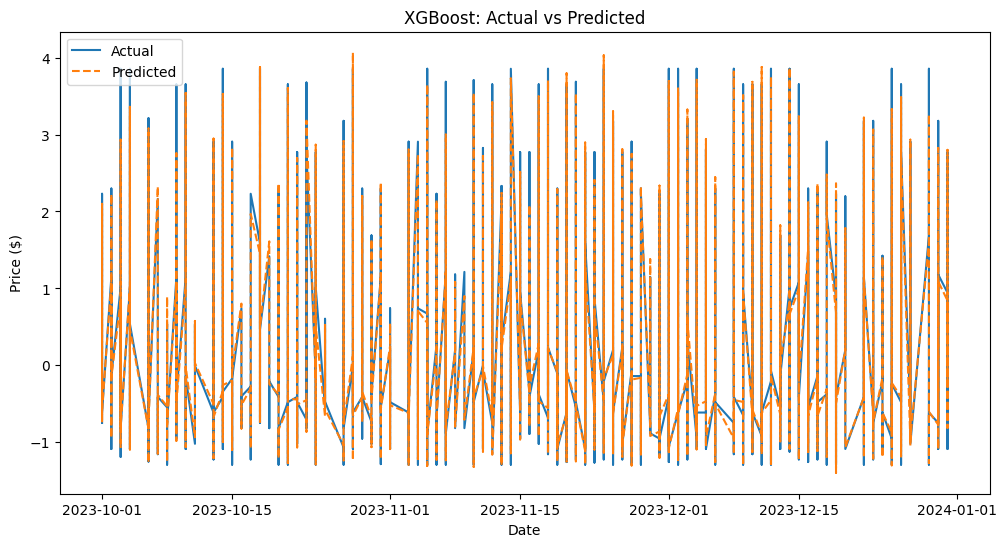

In [91]:


# Actual vs Predicted plot
plt.figure(figsize=(12, 6))
plt.plot(df['Date'].iloc[-len(y_test):], y_test, label='Actual')
plt.plot(df['Date'].iloc[-len(y_test):], predictions, label='Predicted', linestyle='--')
plt.title('XGBoost: Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.savefig('./Images/actual_vs_predicted.png')
plt.show()

In [92]:
# Ensemble with Holt-Winters
hw = ExponentialSmoothing(y_train, trend='add', seasonal='add', seasonal_periods=12).fit()
hw_forecast = hw.forecast(len(y_test))
ensemble_predictions = (predictions + hw_forecast) / 2
ensemble_mae = mean_absolute_error(y_test, ensemble_predictions)
ensemble_rmse = np.sqrt(mean_squared_error(y_test, ensemble_predictions))
print(f"Ensemble MAE: {ensemble_mae:.6f}")
print(f"Ensemble RMSE: {ensemble_rmse:.6f}")

Ensemble MAE: 18.071056
Ensemble RMSE: 18.833382


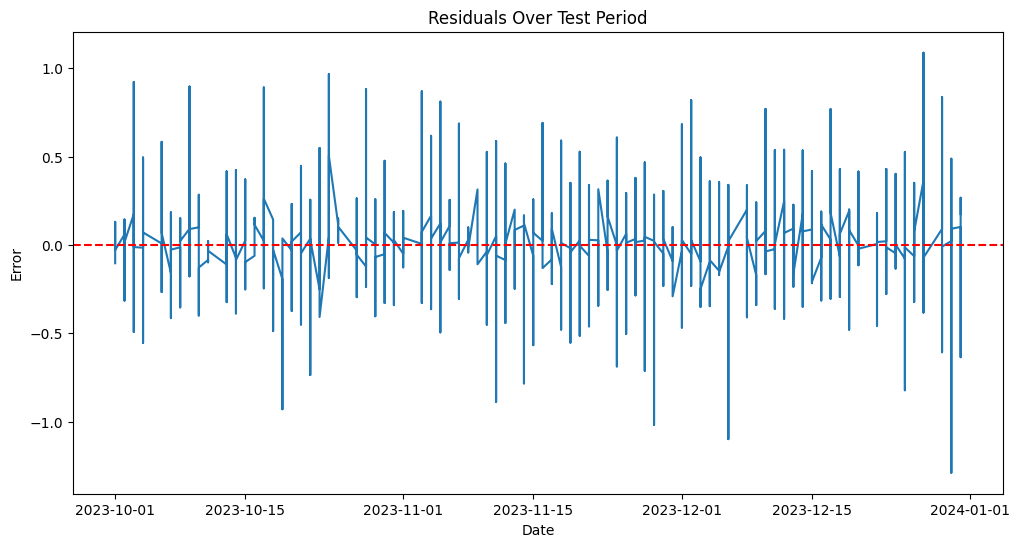

In [93]:
residuals = y_test - predictions
plt.figure(figsize=(12, 6))
plt.plot(df['Date'].iloc[-len(y_test):], residuals)
plt.title('Residuals Over Test Period')
plt.xlabel('Date')
plt.ylabel('Error')
plt.axhline(0, color='red', linestyle='--')
plt.savefig('./Images/residuals.png')
plt.show()


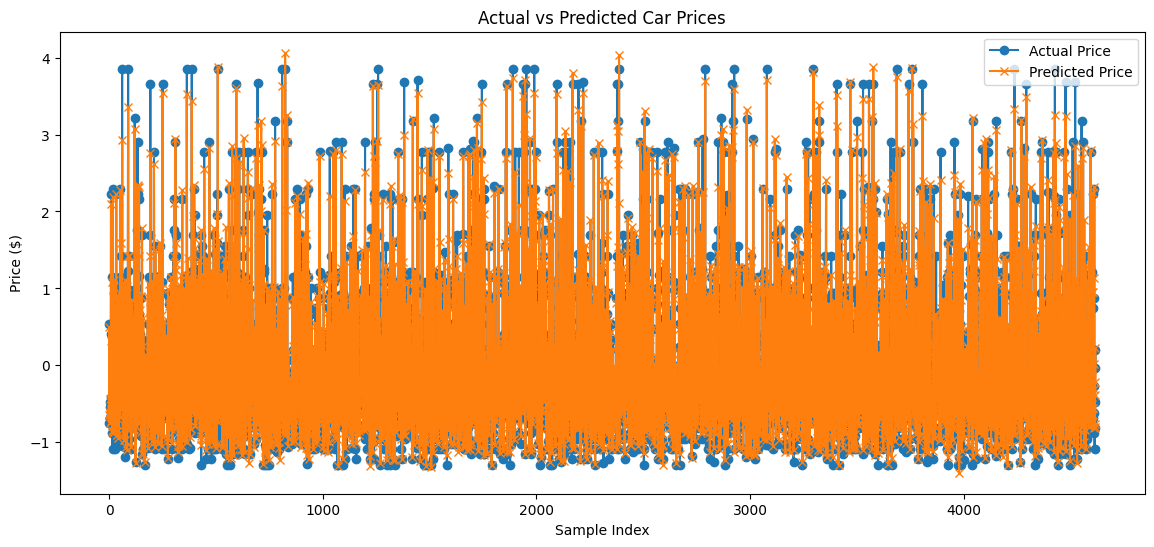

In [94]:
# Actual vs Predicted Visualization
plt.figure(figsize=(14,6))
plt.plot(y_test.values, label='Actual Price', marker='o')
plt.plot(predictions, label='Predicted Price', marker='x')
plt.title('Actual vs Predicted Car Prices')
plt.xlabel('Sample Index')
plt.ylabel('Price ($)')
plt.legend()
plt.show()

# **Save the best model**

In [53]:
joblib.dump(Random_Forest_Regressor, 'Random_Forest_Regressor.pkl')
joblib.dump(XGBoost_Regressor, 'XGBoost_Regressor.pkl')
joblib.dump(Gradient_Boosting_Regressor, 'Gradient_Boosting_Regressor.pkl')
joblib.dump(final_model, 'Desision_tree_Regressor.pkl')

['Desision_tree_Regressor.pkl']

# **Final Conclusion: Best Model and Justification**
**Best Model: Random Forest (RF)**
Why Random Forest is the Best Overall:

**Highest Accuracy:**
Random Forest achieves the highest R² of 0.9973, indicating that it explains the most variance in the target variable compared to other models. This makes it the most accurate model in terms of predicting your dataset.

**Lowest Error Metrics:**
Random Forest has the lowest MAE (0.0147) and MAPE (0.0588), which means it makes fewer errors in its predictions and has the most consistent accuracy. Additionally, it ties for the lowest MSE (0.0027), further reinforcing its precision.

**Stable Performance:**
Random Forest consistently outperforms other models across multiple folds during cross-validation, demonstrating its robust generalization ability. This suggests it performs reliably on unseen data, avoiding overfitting and underfitting.

**Feature Importance:**
Random Forest also provides valuable insights into feature importance, which is useful for understanding which features have the most impact on predictions. This can be crucial for decision-making, especially in applications where model interpretability is important.

**Trade-Off: Gradient Boosting (GB)**
While Random Forest is the best for accuracy and generalization, Gradient Boosting offers an excellent trade-off between performance and speed. It performs almost identically to Random Forest in terms of R² (0.9973) and MSE (0.0027), but with slightly higher error metrics (MAE and MAPE).

**Why choose Gradient Boosting?**

It offers much faster training times (28 seconds vs. 105 seconds for RF), making it more suitable for scenarios where model retraining needs to be done frequently.

For production environments where speed is critical, Gradient Boosting is a strong contender while maintaining near-identical performance to Random Forest.


# 


<head>
    <title>Team Credits</title>
    <style>
        body {
            font-family: Arial, sans-serif;
            background-color:rgba(23, 20, 20, 0.74);
            margin: 0;
            padding: 0;
            display: flex;
            justify-content: center;
            align-items: center;
            min-height: 100vh;
        }
        .container {
            text-align: center;
            background-color:rgb(4, 88, 140);
            padding: 40px;
            border-radius: 10px;
            box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);
            max-width: 1100px;
            width: 100%;
        }
        h1 {
            color: #333;
            font-size: 2.5em;
            margin-bottom: 10px;
        }
        h3 {
            color: #333;
            font-size: 1.5em;
            margin: 20px 0;
        }
        ul {
            list-style: none;
            padding: 0;
            margin: 20px 0;
        }
        ul li {
            font-size: 1.2em;
            margin: 10px 0;
        }
        ul li a {
            color: #333;
            text-decoration: none;
            transition: color 0.3s;
        }
        ul li a:hover {
            color: #007bff;
        }
        .github-section {
            margin-top: 30px;
        }
        .github-section p {
            color: #333;
            font-size: 1.1em;
            margin-bottom: 10px;
        }
        .github-section a img {
            width: 50px;
            height: 50px;
            transition: transform 0.3s;
        }
        .github-section a img:hover {
            transform: scale(1.1);
        }
    </style>
</head>
<body>
    <div class="container">
        <h1>Thank You for Your Time and Efforts!</h1>
        <h3>This Work Done By Our Team:</h3>
        <ul>
            <li><a href="https://github.com/youssef-113" target="_blank">Youssef Bassiony Abdlah</a></li>
            <li><a href="https://github.com/AhmedGamall-1" target="_blank">Ahmed Gamall</a></li>
            <li><a href="https://github.com/Begad" target="_blank">Begad Abdelghafar</a></li>
            <li><a href="https://github.com/MustafaNasser005" target="_blank">Mustafa Nasser</a></li>
            <li><a href="https://github.com/mohamedamr21c" target="_blank">Mohammed Amr </a></li>
        </ul>
        <div class="github-section">
            <p>For GitHub Repository</p>
            <a href="https://github.com/AhmedGamall-1/Sales-forcasting-and-optmization/tree/main" title="Redirect to GitHub" target="_blank">
                <img src="https://github.githubassets.com/images/modules/logos_page/GitHub-Mark.png" alt="GitHub">
            </a>
        </div>

</body>
